# Gaussian mixture models

Assumes the data is generated from underlying gaussian distributions.

Parameter selection:

* n_components: The number of mixture components (gaussians to compare). Can be determined using the Bayesian Information Criterion (BIC) method.
* The rest are left by default

Returns (attributes):
* weights_: The weights of each mixture component.

* means_: The mean of each mixture component.

* covariances_: The covariance of each mixture component. The shape depends on covariance_type:

* precisions_: The precision matrices for each component in the mixture. A precision matrix is the inverse of a covariance matrix. 

* precisions_cholesky_: The cholesky decomposition of the precision matrices of each mixture component. 

* converged_: True when convergence was reached in fit(), False otherwise.

* n_iter_: Number of step used by the best fit of EM to reach the convergence.

* lower_bound_: Lower bound value on the log-likelihood (of the training data with respect to the model) of the best fit of EM

In [15]:
%matplotlib inline
import math
import os
import hdbscan
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns;
sns.set()
from collections import defaultdict
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
from scipy.spatial.distance import pdist, squareform
from scipy.cluster import hierarchy
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import estimate_bandwidth
from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
from kneed import KneeLocator
plt.rcParams["figure.figsize"] = (12,7)

In [55]:
from read_clustering.variant_call import VariantCall
path = 'C:/Users/lalaj/PycharmProjects/untitled3/read_clustering/tests/test_files/native_cbf5_gal.csv'
native = VariantCall(path)

In [8]:
list_18 = native.get_subunit_data('RDN18-1')
list_25 = native.get_subunit_data('RDN25-1')

# Determine n_components

As described in https://github.com/vlavorini/ClusterCardinality/blob/master/Cluster%20Cardinality.ipynb


*Bayesian Information Criterion (BIC)*

* Estimates how good the GMM is when predicting the actual dataset. The lower, the better.

* The value normally decreases as the number of components increases.

* It is more useful to look at its gradient curve. The optimal value is one after which the gradient does not change significantly 


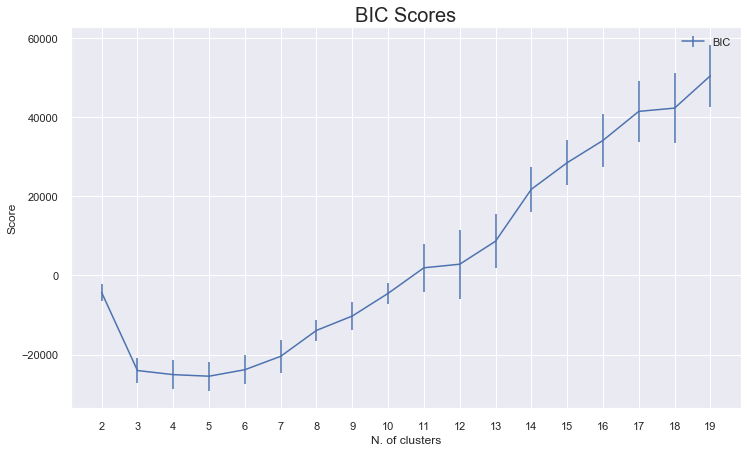

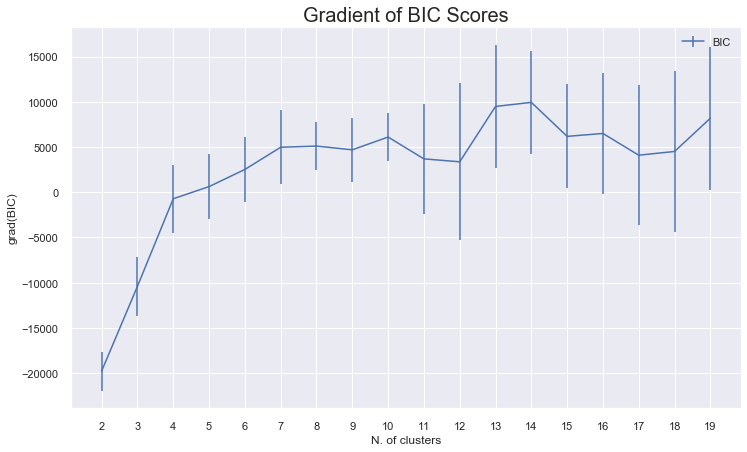

In [36]:
native.BIC(list_18)

For 18S, 7 is an optimal number of clusters.

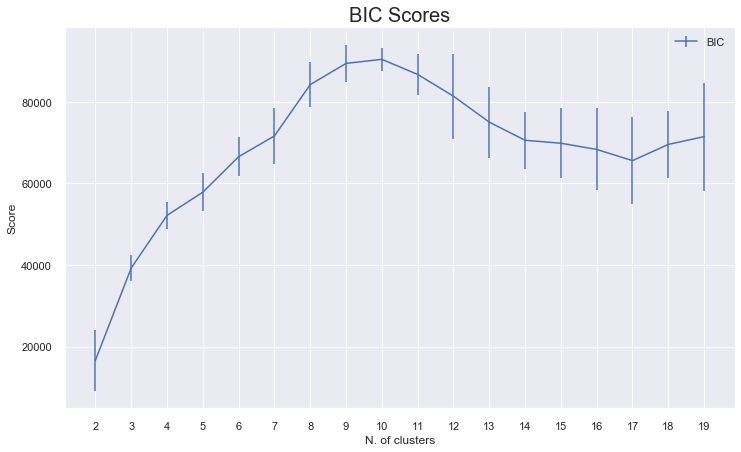

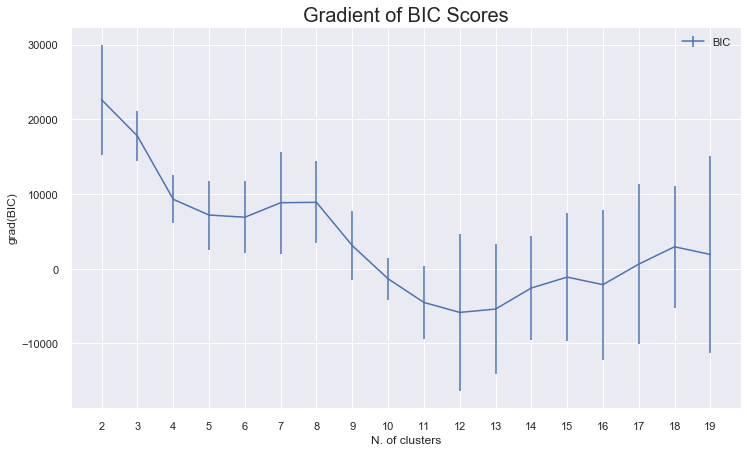

In [13]:
native.BIC(list_25)  

Although there is no clear pattern, for 25S an optimal number could be between 4 and 6.

Plotting with selected parameters:

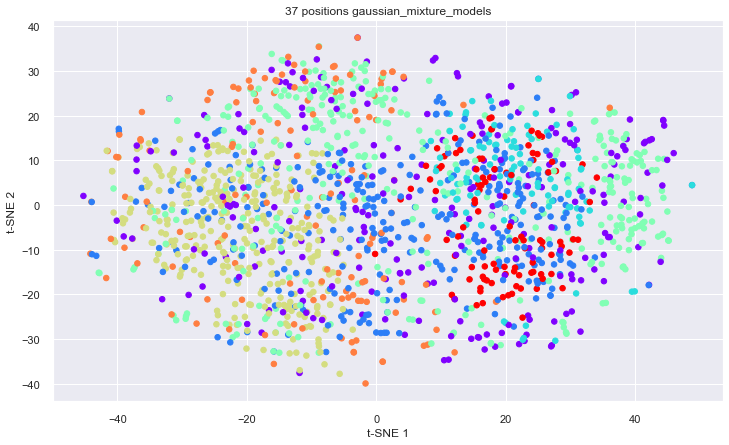

In [56]:
#18S
native.plot_tSNE_reads_covering_positions_data(list_18, 'gaussian_mixture_models', n_clusters = 7) 

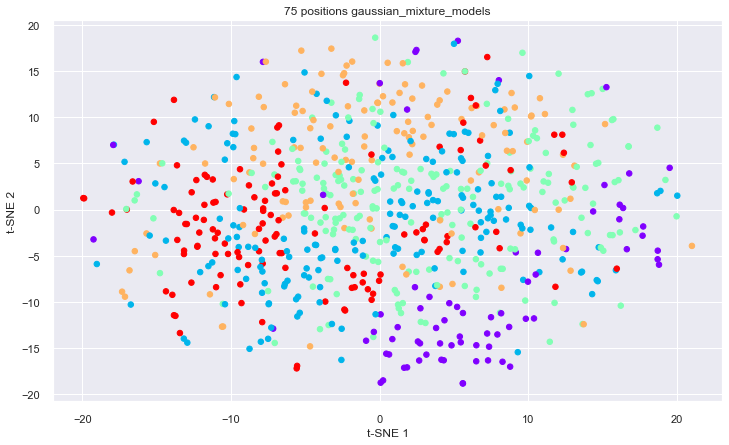

In [58]:
#25S
native.plot_tSNE_reads_covering_positions_data(list_25, 'gaussian_mixture_models', n_clusters=5) 